<a href="https://colab.research.google.com/github/whtan88/RandomDataAnalyst_DataAnalysis/blob/main/MLBB_Heros_Network_Link_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
from matplotlib import pyplot as plt
import collections
import itertools
from collections import Counter
import networkx as nx

df = pd.read_csv("https://raw.githubusercontent.com/whtan88/DataSet/main/mlbb_2025_MPL_SEAsia_season_match.csv")

df['Team A'] = df['Team A'].str.replace(' ', '')
df['Team B'] = df['Team B'].str.replace(' ', '')
df['Team A list'] = df['Team A'].apply(lambda x: re.findall(r"[\w.\-]+", x))
df['Team B list'] = df['Team B'].apply(lambda x: re.findall(r"[\w.\-]+", x))

df.head()

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 756.0/756.0 kB 19.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 62.0 MB/s eta 0:00:00


,Team A,Team B,Winning team,Country,Team A list,Team B list
0,"[Kalea,Phoveus,Suyou,Moskov,Zhask]","[Zhuxin,Joy,Gatotkaca,Granger,Hilda]",A,SG,"[Kalea, Phoveus, Suyou, Moskov, Zhask]","[Zhuxin, Joy, Gatotkaca, Granger, Hilda]"
1,"[Kimmy,Joy,Gatotkaca,Granger,Khaleed]","[Kalea,Suyou,Harith,Pharsa,Cici]",A,SG,"[Kimmy, Joy, Gatotkaca, Granger, Khaleed]","[Kalea, Suyou, Harith, Pharsa, Cici]"
2,"[Kimmy,Hayabusa,Gatotkaca,Wanwan,Hylos]","[Chou,Lukas,Valentina,Edith,Irithel]",A,SG,"[Kimmy, Hayabusa, Gatotkaca, Wanwan, Hylos]","[Chou, Lukas, Valentina, Edith, Irithel]"
3,"[Badang,Joy,Valentina,Granger,Khaleed]","[Kimmy,Hylos,Lukas,Mathilda,Moskov]",B,SG,"[Badang, Joy, Valentina, Granger, Khaleed]","[Kimmy, Hylos, Lukas, Mathilda, Moskov]"
4,"[Lukas,Moskov,Gatotkaca,Cici,Selena]","[Mathilda,Zhuxin,Hylos,Irithel,X.Borg]",B,SG,"[Lukas, Moskov, Gatotkaca, Cici, Selena]","[Mathilda, Zhuxin, Hylos, Irithel, X.Borg]"


In [ ]:
# Checking for any spelling errors in the heroes and adjusting them accordingly

def check_list(df):
  list_team_a = df['Team A list'].tolist()
  list_team_b = df['Team B list'].tolist()

  list_of_heroes = list_team_a + list_team_b
  list_of_heroes = [item for sublist in list_of_heroes for item in sublist]
  return (collections.Counter(list_of_heroes).most_common())

print(check_list(df))

[('Granger', 415), ('Suyou', 353), ('Harith', 345), ('Gatotkaca', 309), ('Badang', 283), ('Kalea', 278), ('Joy', 277), ('Pharsa', 239), ('Phoveus', 237), ('Zhuxin', 228), ('Hylos', 224), ('Hayabusa', 215), ('Chou', 200), ('Moskov', 185), ('Valentina', 179), ('Hilda', 174), ('Gloo', 161), ('Kimmy', 151), ('Lukas', 151), ('Cici', 131), ('LuoYi', 111), ('Baxia', 102), ('Chip', 95), ('Jawhead', 94), ('Selena', 91), ('Yve', 86), ('Wanwan', 85), ('Fredrinn', 85), ('Irithel', 81), ('Cecilion', 81), ('Ling', 79), ('Karrie', 77), ('Bruno', 71), ('Mathilda', 71), ('Edith', 71), ('Fanny', 58), ('Faramis', 58), ('Khaleed', 57), ('Novaria', 55), ('Vexana', 53), ('Beatrix', 43), ('Tigreal', 42), ('Alpha', 41), ('Hanzo', 36), ('Claude', 34), ('Franco', 33), ('X.Borg', 28), ('Masha', 26), ('Nolan', 24), ('Zhask', 23), ('Guinevere', 22), ('Esmeralda', 22), ('Benedetta', 20), ('Aurora', 20), ('Terizla', 19), ('Lancelot', 18), ('Arlott', 16), ('Ruby', 14), ('Angela', 13), ('Vale', 13), ('Clint', 12), ('N

In [ ]:
# Replace spelling errors and recheck
replace_names = {'Camilla':'Carmilla', 'Karie':'Karrie', 'TIgreal':'Tigreal', 'Gatotkcaca':'Gatotkaca', 'Zhxuin':'Zhuxin', 'Edih':'Edith', 'Ixia':'Baxia', 'Phoevus':'Phoveus', 'Mathulda':'Mathilda', 'Minisitthar':'Minsitthar'}

for old_name, new_name in replace_names.items():
    df['Team A'] = df['Team A'].str.replace(old_name, new_name)
    df['Team B'] = df['Team B'].str.replace(old_name, new_name)

df['Team A list'] = df['Team A'].apply(lambda x: re.findall(r"[\w.\-]+", x))
df['Team B list'] = df['Team B'].apply(lambda x: re.findall(r"[\w.\-]+", x))

print(check_list(df))

[('Granger', 415), ('Suyou', 353), ('Harith', 345), ('Gatotkaca', 310), ('Badang', 283), ('Kalea', 278), ('Joy', 277), ('Pharsa', 239), ('Phoveus', 238), ('Zhuxin', 229), ('Hylos', 224), ('Hayabusa', 215), ('Chou', 200), ('Moskov', 185), ('Valentina', 179), ('Hilda', 174), ('Gloo', 161), ('Kimmy', 151), ('Lukas', 151), ('Cici', 131), ('LuoYi', 111), ('Baxia', 103), ('Chip', 95), ('Jawhead', 94), ('Selena', 91), ('Yve', 86), ('Wanwan', 85), ('Fredrinn', 85), ('Irithel', 81), ('Cecilion', 81), ('Ling', 79), ('Karrie', 78), ('Mathilda', 72), ('Edith', 72), ('Bruno', 71), ('Fanny', 58), ('Faramis', 58), ('Khaleed', 57), ('Novaria', 55), ('Vexana', 53), ('Beatrix', 43), ('Tigreal', 43), ('Alpha', 41), ('Hanzo', 36), ('Claude', 34), ('Franco', 33), ('X.Borg', 28), ('Masha', 26), ('Nolan', 24), ('Zhask', 23), ('Guinevere', 22), ('Esmeralda', 22), ('Benedetta', 20), ('Aurora', 20), ('Terizla', 19), ('Lancelot', 18), ('Arlott', 16), ('Ruby', 14), ('Angela', 13), ('Vale', 13), ('Clint', 12), ('N

In [ ]:
# Inspecting the row values for spelling errors
df[df['Team A'].str.contains('Ixia') == True]

,Team A,Team B,Winning team,Country,Team A list,Team B list


In [ ]:
list_cntry = df['Country'].unique().tolist()

print('Most popular heroes used:')
print(check_list(df)[:5])
print()
for i in list_cntry:
  print(f'Most popular heroes used in {i}:')
  print(check_list(df[df['Country'] == i])[:5])
  print()

Most popular heroes used:
[('Granger', 415), ('Suyou', 353), ('Harith', 345), ('Gatotkaca', 310), ('Badang', 283)]

Most popular heroes used in SG:
[('Granger', 40), ('Gatotkaca', 38), ('Kalea', 36), ('Hayabusa', 35), ('Kimmy', 32)]

Most popular heroes used in KH:
[('Suyou', 67), ('Granger', 56), ('Gatotkaca', 52), ('Harith', 48), ('Badang', 45)]

Most popular heroes used in PH:
[('Granger', 124), ('Suyou', 100), ('Harith', 99), ('Joy', 73), ('Pharsa', 67)]

Most popular heroes used in ID:
[('Granger', 117), ('Suyou', 113), ('Gatotkaca', 104), ('Harith', 95), ('Joy', 92)]

Most popular heroes used in MY:
[('Harith', 80), ('Kalea', 79), ('Granger', 78), ('Badang', 62), ('Joy', 61)]



In [ ]:
# Check popular heroes used
print(f'No. of unique heroes used in the tournaments: {len(check_list(df))}')
print()
print('Most popular heroes used:')
for j in range(1,6):
  hero = check_list(df)[:5][j-1][0]
  hero_percentage_used = round(100*check_list(df)[:5][j-1][1]/len(df),2)
  print(f'{j} : {hero} (used in {hero_percentage_used}% of matches)')
print()
for i in list_cntry:
  print(i)
  for j in range(1,6):
    hero = check_list(df[df['Country'] == i])[:5][j-1][0]
    hero_percentage_used = round(100*check_list(df[df['Country'] == i])[:5][j-1][1]/len(df[df['Country'] == i]),2)
    hero_percentage_used
    print(f'{j} : {hero} (used in {hero_percentage_used}% of matches)')
  print()

No. of unique heroes used in the tournaments: 99

Most popular heroes used:
1 : Granger (used in 59.54% of matches)
2 : Suyou (used in 50.65% of matches)
3 : Harith (used in 49.5% of matches)
4 : Gatotkaca (used in 44.48% of matches)
5 : Badang (used in 40.6% of matches)

SG
1 : Granger (used in 57.14% of matches)
2 : Gatotkaca (used in 54.29% of matches)
3 : Kalea (used in 51.43% of matches)
4 : Hayabusa (used in 50.0% of matches)
5 : Kimmy (used in 45.71% of matches)

KH
1 : Suyou (used in 67.0% of matches)
2 : Granger (used in 56.0% of matches)
3 : Gatotkaca (used in 52.0% of matches)
4 : Harith (used in 48.0% of matches)
5 : Badang (used in 45.0% of matches)

PH
1 : Granger (used in 71.68% of matches)
2 : Suyou (used in 57.8% of matches)
3 : Harith (used in 57.23% of matches)
4 : Joy (used in 42.2% of matches)
5 : Pharsa (used in 38.73% of matches)

ID
1 : Granger (used in 54.93% of matches)
2 : Suyou (used in 53.05% of matches)
3 : Gatotkaca (used in 48.83% of matches)
4 : Harith 

In [ ]:
# Check popular heroes used
df['Winning team heroes'] = np.where(df['Winning team'] == 'A', df['Team A list'], df['Team B list'])
df['Losing team heroes'] = np.where(df['Winning team'] != 'A', df['Team A list'], df['Team B list'])

def check_team_rate(df,col):
  list_of_heroes = df[col].tolist()
  list_of_heroes = [item for sublist in list_of_heroes for item in sublist]
  return (collections.Counter(list_of_heroes).most_common())

print('Most popular heroes used in winning teams:')
for j in range(1,6):
  hero = check_team_rate(df,'Winning team heroes')[:5][j-1][0]
  print(f'{j} : {hero}')
print()
for i in list_cntry:
  print(i)
  for j in range(1,6):
    df_cntry = df[df['Country'] == i].copy()
    hero = check_team_rate(df_cntry,'Winning team heroes')[:5][j-1][0]
    print(f'{j} : {hero}')
print()
print('Most popular heroes used in losing teams:')
for j in range(1,6):
  hero = check_team_rate(df,'Losing team heroes')[:5][j-1][0]
  print(f'{j} : {hero}')
print()
for i in list_cntry:
  print(i)
  for j in range(1,6):
    df_cntry = df[df['Country'] == i].copy()
    hero = check_team_rate(df_cntry,'Losing team heroes')[:5][j-1][0]
    print(f'{j} : {hero}')

Most popular heroes used in winning teams:
1 : Granger
2 : Suyou
3 : Harith
4 : Kalea
5 : Gatotkaca

SG
1 : Gatotkaca
2 : Kalea
3 : Kimmy
4 : Granger
5 : Zhuxin
KH
1 : Suyou
2 : Granger
3 : Gatotkaca
4 : Harith
5 : Badang
PH
1 : Granger
2 : Harith
3 : Suyou
4 : Pharsa
5 : Joy
ID
1 : Suyou
2 : Granger
3 : Gatotkaca
4 : Harith
5 : Badang
MY
1 : Kalea
2 : Harith
3 : Phoveus
4 : Granger
5 : Joy

Most popular heroes used in losing teams:
1 : Granger
2 : Suyou
3 : Harith
4 : Gatotkaca
5 : Joy

SG
1 : Granger
2 : Hayabusa
3 : Gatotkaca
4 : Kalea
5 : Zhuxin
KH
1 : Suyou
2 : Granger
3 : Gatotkaca
4 : Harith
5 : Zhuxin
PH
1 : Granger
2 : Suyou
3 : Harith
4 : Joy
5 : Gatotkaca
ID
1 : Joy
2 : Gatotkaca
3 : Granger
4 : Harith
5 : Suyou
MY
1 : Granger
2 : Harith
3 : Badang
4 : Kalea
5 : Pharsa


<Axes: xlabel='Matches played', ylabel='Count'>

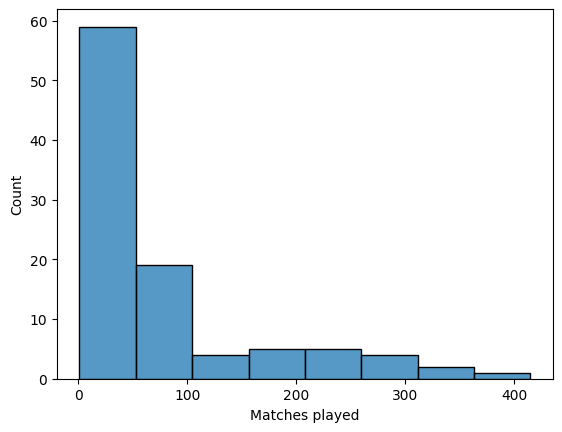

In [ ]:
# Assess the win rate of the heroes used

list_winning_heroes = check_team_rate(df,'Winning team heroes')
list_losing_heroes = check_team_rate(df,'Losing team heroes')

df_winning_heroes = pd.DataFrame(list_winning_heroes, columns=['Hero', 'Count of Wins'])
df_losing_heroes = pd.DataFrame(list_losing_heroes, columns=['Hero', 'Count of Losses'])
df_win_rate = pd.merge(df_winning_heroes, df_losing_heroes, on='Hero', how='outer')
df_win_rate = df_win_rate.fillna(0)
df_win_rate['Win Rate'] = round(100*(df_win_rate['Count of Wins']/(df_win_rate['Count of Wins']+df_win_rate['Count of Losses'])),2)
df_win_rate['Loss Rate'] = 100 - df_win_rate['Win Rate']
df_win_rate['Matches played'] = df_win_rate['Count of Wins'] + df_win_rate['Count of Losses']
# Histogram plot of the no. of matches that the heroes played in
sns.histplot(data=df_win_rate, x="Matches played", binwidth=50)

In [ ]:
# Top win rate of heroes with >= 100 matches played
df_win_rate[df_win_rate['Matches played'] >= 100].sort_values(by='Win Rate',ascending=False)[:10]

,Hero,Count of Wins,Count of Losses,Win Rate,Loss Rate,Matches played
60,LuoYi,65.0,46.0,58.56,41.44,111.0
52,Kimmy,84.0,67.0,55.63,44.37,151.0
76,Phoveus,131.0,107.0,55.04,44.96,238.0
48,Kalea,152.0,126.0,54.68,45.32,278.0
32,Granger,225.0,190.0,54.22,45.78,415.0
75,Pharsa,127.0,112.0,53.14,46.86,239.0
36,Harith,181.0,164.0,52.46,47.54,345.0
31,Gloo,84.0,77.0,52.17,47.83,161.0
81,Suyou,181.0,172.0,51.27,48.73,353.0
6,Badang,145.0,138.0,51.24,48.76,283.0


In [ ]:
# Top loss rate of heroes with >= 100 matches played
df_win_rate[df_win_rate['Matches played'] >= 100].sort_values(by='Win Rate',ascending=True)[:10]

,Hero,Count of Wins,Count of Losses,Win Rate,Loss Rate,Matches played
18,Cici,56.0,75.0,42.75,57.25,131.0
87,Valentina,79.0,100.0,44.13,55.87,179.0
68,Moskov,84.0,101.0,45.41,54.59,185.0
98,Zhuxin,105.0,124.0,45.85,54.15,229.0
40,Hylos,105.0,119.0,46.88,53.12,224.0
39,Hilda,83.0,91.0,47.70,52.30,174.0
37,Hayabusa,104.0,111.0,48.37,51.63,215.0
8,Baxia,50.0,53.0,48.54,51.46,103.0
30,Gatotkaca,152.0,158.0,49.03,50.97,310.0
44,Joy,137.0,140.0,49.46,50.54,277.0


<Axes: xlabel='Win Rate', ylabel='Loss Rate'>

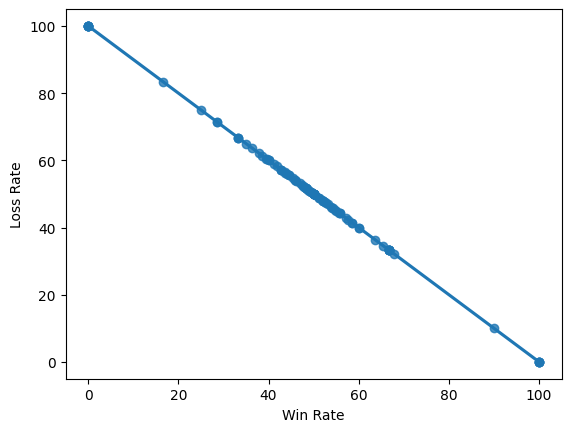

In [ ]:
# Plot of Loss Rate over Win Rate
sns.regplot(data=df_win_rate, y='Loss Rate', x='Win Rate')

**Network Link Analysis of Winning team heroes**

In [ ]:
# for combination of winning teams

list_source_heroes = []
list_target_heroes = []

for i in df['Winning team heroes']:
  h1, h2 = zip(*list(itertools.combinations(i,2)))
  list_source_heroes.append(h1)
  list_target_heroes.append(h2)

list_source_heroes = list(itertools.chain.from_iterable(list_source_heroes))
list_target_heroes = list(itertools.chain.from_iterable(list_target_heroes))

print(list_source_heroes)
print(len(list_source_heroes))
print(list_target_heroes)
print(len(list_target_heroes))

['Kalea', 'Kalea', 'Kalea', 'Kalea', 'Phoveus', 'Phoveus', 'Phoveus', 'Suyou', 'Suyou', 'Moskov', 'Kimmy', 'Kimmy', 'Kimmy', 'Kimmy', 'Joy', 'Joy', 'Joy', 'Gatotkaca', 'Gatotkaca', 'Granger', 'Kimmy', 'Kimmy', 'Kimmy', 'Kimmy', 'Hayabusa', 'Hayabusa', 'Hayabusa', 'Gatotkaca', 'Gatotkaca', 'Wanwan', 'Kimmy', 'Kimmy', 'Kimmy', 'Kimmy', 'Hylos', 'Hylos', 'Hylos', 'Lukas', 'Lukas', 'Mathilda', 'Mathilda', 'Mathilda', 'Mathilda', 'Mathilda', 'Zhuxin', 'Zhuxin', 'Zhuxin', 'Hylos', 'Hylos', 'Irithel', 'Joy', 'Joy', 'Joy', 'Joy', 'Kimmy', 'Kimmy', 'Kimmy', 'Hylos', 'Hylos', 'Bruno', 'Granger', 'Granger', 'Granger', 'Granger', 'Gatotkaca', 'Gatotkaca', 'Gatotkaca', 'Yve', 'Yve', 'Chou', 'Kimmy', 'Kimmy', 'Kimmy', 'Kimmy', 'Suyou', 'Suyou', 'Suyou', 'Gatotkaca', 'Gatotkaca', 'Chou', 'Hylos', 'Hylos', 'Hylos', 'Hylos', 'Fanny', 'Fanny', 'Fanny', 'Moskov', 'Moskov', 'Chou', 'Kimmy', 'Kimmy', 'Kimmy', 'Kimmy', 'Suyou', 'Suyou', 'Suyou', 'Hylos', 'Hylos', 'Jawhead', 'Hayabusa', 'Hayabusa', 'Hayabusa

In [ ]:
# Creating dataframe for Graph visualisation of network analysis
df_winning_heroes_network = pd.DataFrame(list(zip(list_source_heroes, list_target_heroes)), columns=['source', 'target'])
df_winning_heroes_network['value'] = 1
df_winning_heroes_network = df_winning_heroes_network.groupby(['source', 'target']).sum().reset_index().sort_values(by='value',ascending=False)

df_winning_heroes_network_1 = df_winning_heroes_network.copy()
df_winning_heroes_network_1['tuple_source_target'] = df_winning_heroes_network_1.apply(lambda row: tuple(sorted([row['source'], row['target']])), axis=1)
df_winning_heroes_network_1 = df_winning_heroes_network_1.groupby(['tuple_source_target']).sum().reset_index().sort_values(by='value',ascending=False)
df_winning_heroes_network_1[['source', 'target']] = df_winning_heroes_network_1['tuple_source_target'].apply(pd.Series)
df_winning_heroes_network_1.drop('tuple_source_target', axis=1, inplace=True)
df_winning_heroes_network_1

,source,target,value
748,Granger,Joy,59
691,Gatotkaca,Suyou,53
773,Granger,Suyou,49
751,Granger,Kalea,49
840,Harith,Suyou,48
...,...,...,...
14,Alice,Granger,1
13,Alice,Gatotkaca,1
12,Alice,Floryn,1
11,Alice,Cici,1


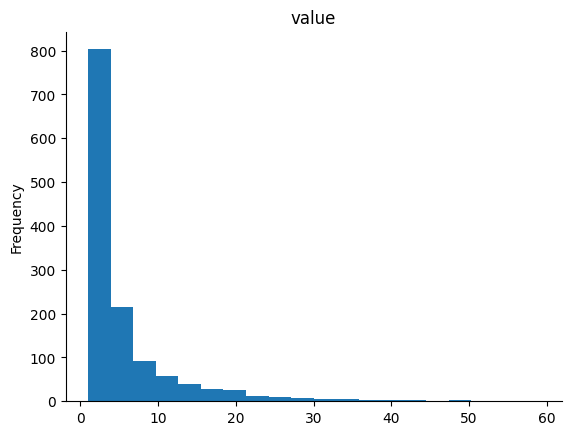

In [ ]:
# Plot distribution of hero network connections
df_winning_heroes_network_1['value'].plot(kind='hist', bins=20, title='value')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
# Distribution of linkages of network of heroes
df_winning_heroes_network_1['value'].describe()

,value
count,1317.000000
mean,5.292331
std,7.319170
min,1.000000
25%,1.000000
50%,2.000000
75%,6.000000
max,59.000000


In [ ]:
df_winning_heroes_network_2 = df_winning_heroes_network_1[df_winning_heroes_network_1['value'] >= 25]
df_winning_heroes_network_2['value'].describe()

,value
count,44.000000
mean,34.386364
std,8.430884
min,26.000000
25%,28.000000
50%,31.000000
75%,39.250000
max,59.000000


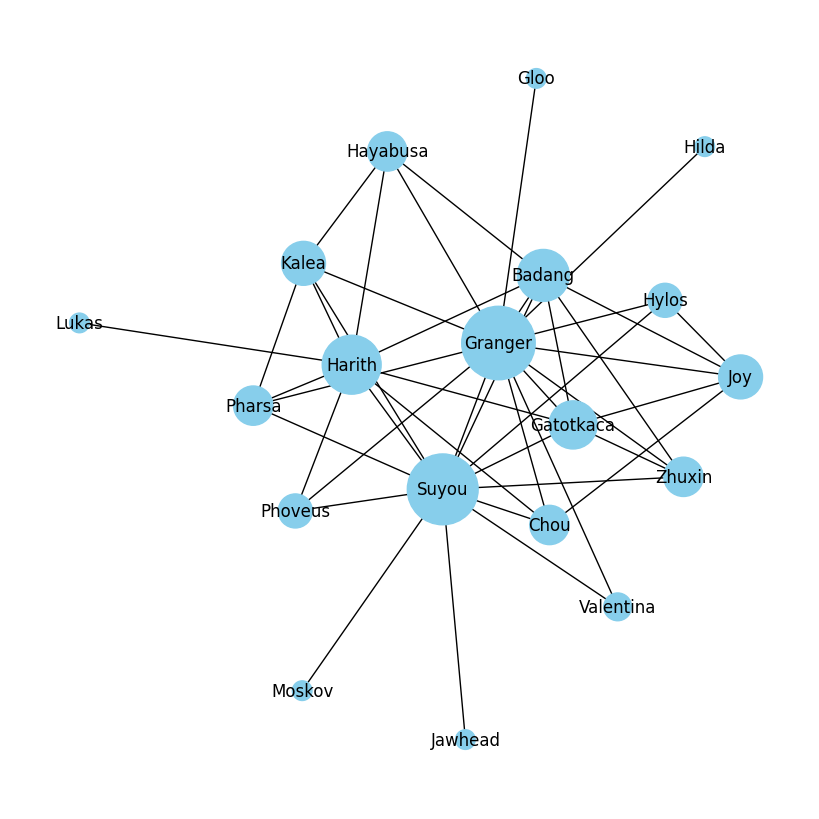

In [ ]:
# Create a graph from a pandas dataframe
G = nx.from_pandas_edgelist(df_winning_heroes_network_2,
                            source = "source",
                            target = "target",
                            edge_attr = "value",
                            create_using = nx.Graph())

node_sizes = [G.degree(node) * 200 for node in G.nodes()]

plt.figure(figsize=(8,8))
pos = nx.kamada_kawai_layout(G)
nx.draw(G, with_labels=True, node_color='skyblue', edge_cmap=plt.cm.Blues, pos = pos, node_size = node_sizes)
plt.show()

In [ ]:
# Create a graph from a pandas dataframe
G = nx.from_pandas_edgelist(df_winning_heroes_network_1,
                            source = "source",
                            target = "target",
                            edge_attr = "value",
                            create_using = nx.Graph())

/tmp/ipython-input-2297327901.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=degree_df, x='hero', y='centrality', palette = 'muted')


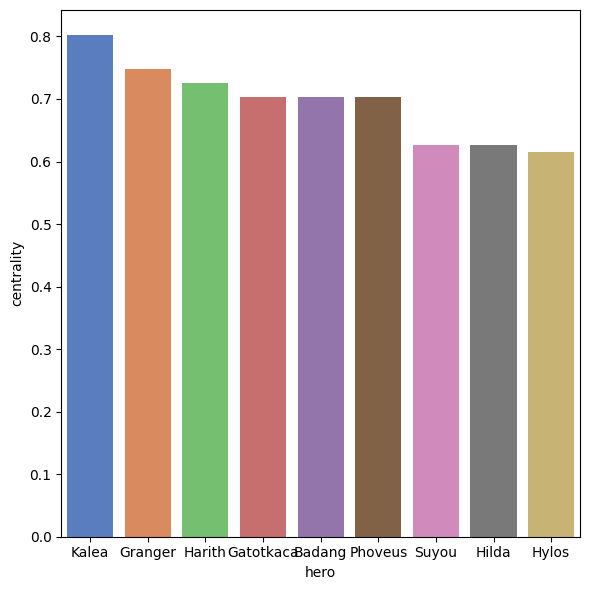

In [ ]:
# Degree centrality
degree_dict = nx.degree_centrality(G)
degree_df = pd.DataFrame.from_dict(degree_dict, orient='index', columns=['centrality'])
degree_df = degree_df.sort_values('centrality', ascending=False)
# Plot top 10 nodes
plt.figure(figsize=(6,6))
degree_df = degree_df.rename_axis('hero').reset_index()[0:9]
sns.barplot(data=degree_df, x='hero', y='centrality', palette = 'muted')
plt.tight_layout()

/tmp/ipython-input-2266368650.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=betweenness_df, x='hero', y='centrality', palette = 'muted')


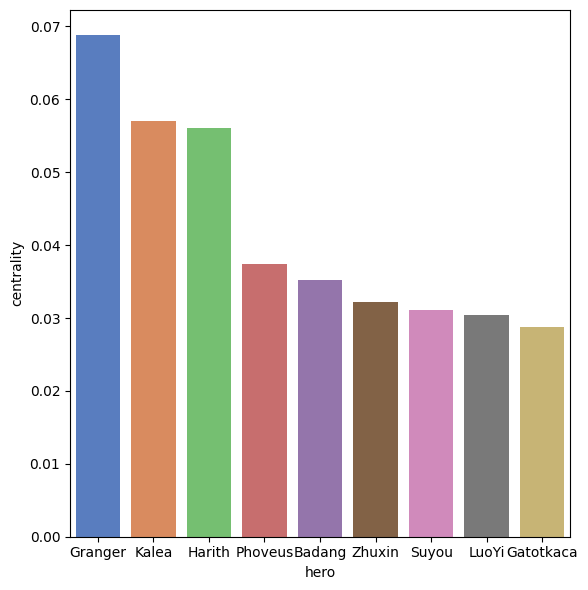

In [ ]:
# Betweenness centrality
betweenness_dict = nx.betweenness_centrality(G)
betweenness_df = pd.DataFrame.from_dict(betweenness_dict, orient='index', columns=['centrality'])
betweenness_df = betweenness_df.sort_values('centrality', ascending=False)
# Plot top 10 nodes
plt.figure(figsize=(6,6))
betweenness_df = betweenness_df.rename_axis('hero').reset_index()[0:9]
sns.barplot(data=betweenness_df, x='hero', y='centrality', palette = 'muted')
plt.tight_layout()

/tmp/ipython-input-3863727044.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=closeness_df, x='hero', y='centrality', palette = 'muted')


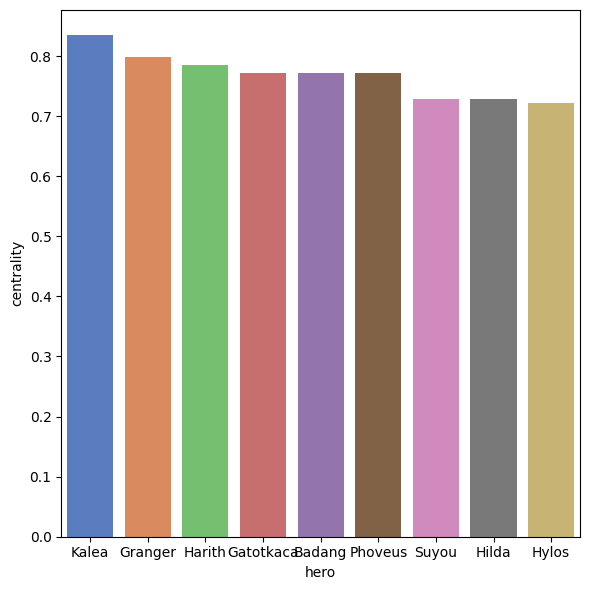

In [ ]:
# Closeness centrality
closeness_dict = nx.closeness_centrality(G)
closeness_df = pd.DataFrame.from_dict(closeness_dict, orient='index', columns=['centrality'])
closeness_df = closeness_df.sort_values('centrality', ascending=False)
# Plot top 10 nodes
plt.figure(figsize=(6,6))
closeness_df = closeness_df.rename_axis('hero').reset_index()[0:9]
sns.barplot(data=closeness_df, x='hero', y='centrality', palette = 'muted')
plt.tight_layout()

/tmp/ipython-input-3791796099.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=eigenvector_df, x='hero', y='centrality', palette = 'muted')


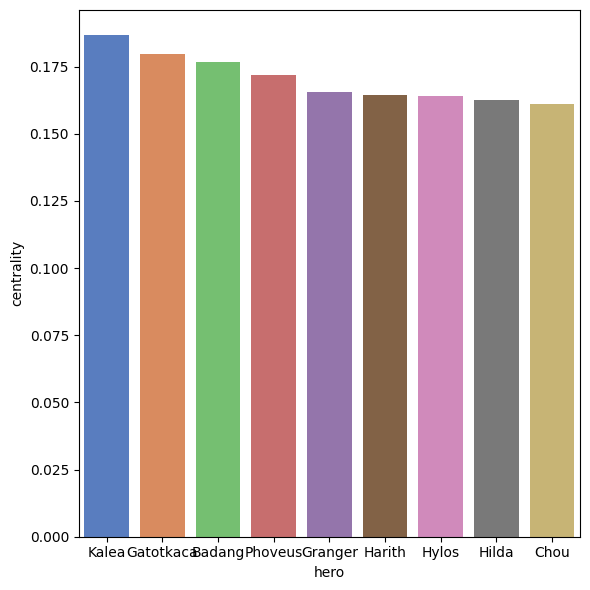

In [ ]:
# Eigenvector centrality
eigenvector_centrality = nx.eigenvector_centrality(G)
eigenvector_df = pd.DataFrame.from_dict(eigenvector_centrality, orient='index', columns=['centrality'])
eigenvector_df = eigenvector_df.sort_values('centrality', ascending=False)
# Plot top 10 nodes
plt.figure(figsize=(6,6))
eigenvector_df = eigenvector_df.rename_axis('hero').reset_index()[0:9]
sns.barplot(data=eigenvector_df, x='hero', y='centrality', palette = 'muted')
plt.tight_layout()

**Network Link Analysis of Losing team heroes**

In [ ]:
# for combination of losing teams

list_source_heroes = []
list_target_heroes = []

for i in df['Losing team heroes']:
  h1, h2 = zip(*list(itertools.combinations(i,2)))
  list_source_heroes.append(h1)
  list_target_heroes.append(h2)

list_source_heroes = list(itertools.chain.from_iterable(list_source_heroes))
list_target_heroes = list(itertools.chain.from_iterable(list_target_heroes))

print(list_source_heroes)
print(len(list_source_heroes))
print(list_target_heroes)
print(len(list_target_heroes))

['Zhuxin', 'Zhuxin', 'Zhuxin', 'Zhuxin', 'Joy', 'Joy', 'Joy', 'Gatotkaca', 'Gatotkaca', 'Granger', 'Kalea', 'Kalea', 'Kalea', 'Kalea', 'Suyou', 'Suyou', 'Suyou', 'Harith', 'Harith', 'Pharsa', 'Chou', 'Chou', 'Chou', 'Chou', 'Lukas', 'Lukas', 'Lukas', 'Valentina', 'Valentina', 'Edith', 'Badang', 'Badang', 'Badang', 'Badang', 'Joy', 'Joy', 'Joy', 'Valentina', 'Valentina', 'Granger', 'Lukas', 'Lukas', 'Lukas', 'Lukas', 'Moskov', 'Moskov', 'Moskov', 'Gatotkaca', 'Gatotkaca', 'Cici', 'Kalea', 'Kalea', 'Kalea', 'Kalea', 'Hayabusa', 'Hayabusa', 'Hayabusa', 'Phoveus', 'Phoveus', 'Beatrix', 'Kalea', 'Kalea', 'Kalea', 'Kalea', 'Suyou', 'Suyou', 'Suyou', 'Zhuxin', 'Zhuxin', 'Karrie', 'Kalea', 'Kalea', 'Kalea', 'Kalea', 'Joy', 'Joy', 'Joy', 'Irithel', 'Irithel', 'Gloo', 'Harith', 'Harith', 'Harith', 'Harith', 'Badang', 'Badang', 'Badang', 'Hayabusa', 'Hayabusa', 'Vexana', 'Harith', 'Harith', 'Harith', 'Harith', 'Hayabusa', 'Hayabusa', 'Hayabusa', 'Chou', 'Chou', 'Novaria', 'Kimmy', 'Kimmy', 'Kimmy

In [ ]:
# Creating dataframe for Graph visualisation of network analysis
df_losing_heroes_network = pd.DataFrame(list(zip(list_source_heroes, list_target_heroes)), columns=['source', 'target'])
df_losing_heroes_network['value'] = 1
df_losing_heroes_network = df_losing_heroes_network.groupby(['source', 'target']).sum().reset_index().sort_values(by='value',ascending=False)

df_losing_heroes_network_1 = df_losing_heroes_network.copy()
df_losing_heroes_network_1['tuple_source_target'] = df_losing_heroes_network_1.apply(lambda row: tuple(sorted([row['source'], row['target']])), axis=1)
df_losing_heroes_network_1 = df_losing_heroes_network_1.groupby(['tuple_source_target']).sum().reset_index().sort_values(by='value',ascending=False)
df_losing_heroes_network_1[['source', 'target']] = df_losing_heroes_network_1['tuple_source_target'].apply(pd.Series)
df_losing_heroes_network_1.drop('tuple_source_target', axis=1, inplace=True)
df_losing_heroes_network_1

,source,target,value
804,Granger,Joy,53
907,Harith,Suyou,48
725,Gatotkaca,Harith,47
828,Granger,Suyou,46
722,Gatotkaca,Granger,44
...,...,...,...
1365,Vale,Wanwan,1
1362,Tigreal,Wanwan,1
1360,Thamuz,YiSun-Shin,1
1,Akai,Badang,1


In [ ]:
# Distribution of linkages of network of heroes
df_losing_heroes_network_1['value'].describe()

,value
count,1377.000000
mean,5.058824
std,6.718393
min,1.000000
25%,1.000000
50%,2.000000
75%,6.000000
max,53.000000


In [ ]:
df_losing_heroes_network_2 = df_losing_heroes_network_1[df_losing_heroes_network_1['value'] >= 25]
df_losing_heroes_network_2['value'].describe()

,value
count,36.000000
mean,33.722222
std,6.755362
min,26.000000
25%,29.000000
50%,31.500000
75%,36.000000
max,53.000000


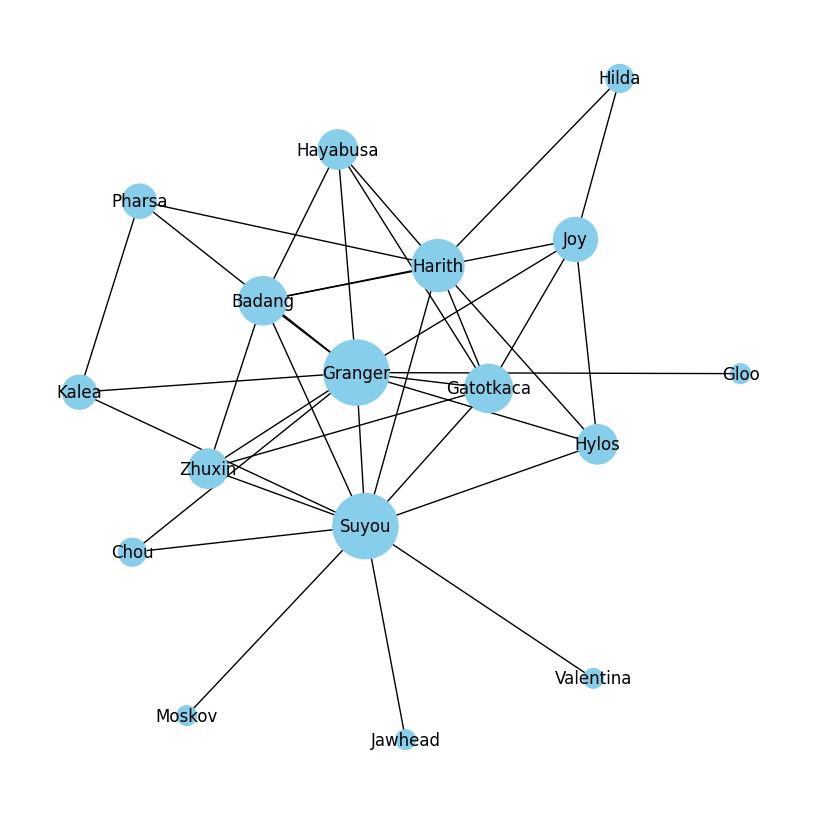

In [ ]:
# Create a graph from a pandas dataframe
G = nx.from_pandas_edgelist(df_losing_heroes_network_2,
                            source = "source",
                            target = "target",
                            edge_attr = "value",
                            create_using = nx.Graph())

node_sizes = [G.degree(node) * 200 for node in G.nodes()]

plt.figure(figsize=(8,8))
pos = nx.kamada_kawai_layout(G)
nx.draw(G, with_labels=True, node_color='skyblue', edge_cmap=plt.cm.Blues, pos = pos, node_size = node_sizes)
plt.show()

In [ ]:
# Create a graph from a pandas dataframe
G = nx.from_pandas_edgelist(df_losing_heroes_network_1,
                            source = "source",
                            target = "target",
                            edge_attr = "value",
                            create_using = nx.Graph())

/tmp/ipython-input-2297327901.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=degree_df, x='hero', y='centrality', palette = 'muted')


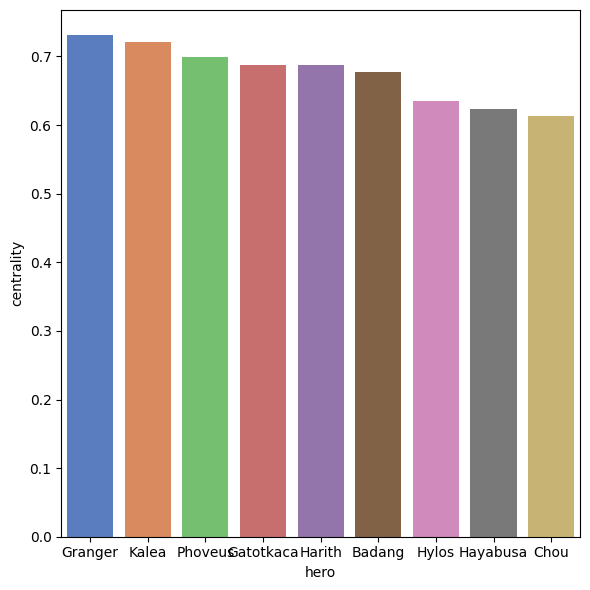

In [ ]:
# Degree centrality
degree_dict = nx.degree_centrality(G)
degree_df = pd.DataFrame.from_dict(degree_dict, orient='index', columns=['centrality'])
degree_df = degree_df.sort_values('centrality', ascending=False)
# Plot top 10 nodes
plt.figure(figsize=(6,6))
degree_df = degree_df.rename_axis('hero').reset_index()[0:9]
sns.barplot(data=degree_df, x='hero', y='centrality', palette = 'muted')
plt.tight_layout()

/tmp/ipython-input-2266368650.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=betweenness_df, x='hero', y='centrality', palette = 'muted')


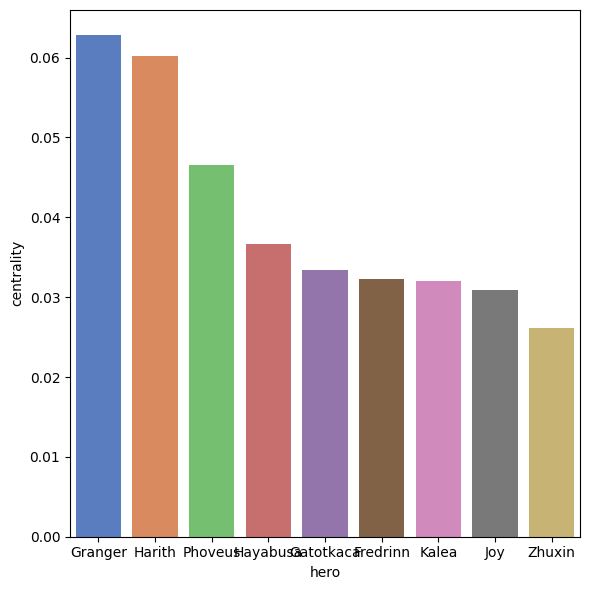

In [ ]:
# Betweenness centrality
betweenness_dict = nx.betweenness_centrality(G)
betweenness_df = pd.DataFrame.from_dict(betweenness_dict, orient='index', columns=['centrality'])
betweenness_df = betweenness_df.sort_values('centrality', ascending=False)
# Plot top 10 nodes
plt.figure(figsize=(6,6))
betweenness_df = betweenness_df.rename_axis('hero').reset_index()[0:9]
sns.barplot(data=betweenness_df, x='hero', y='centrality', palette = 'muted')
plt.tight_layout()

/tmp/ipython-input-3863727044.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=closeness_df, x='hero', y='centrality', palette = 'muted')


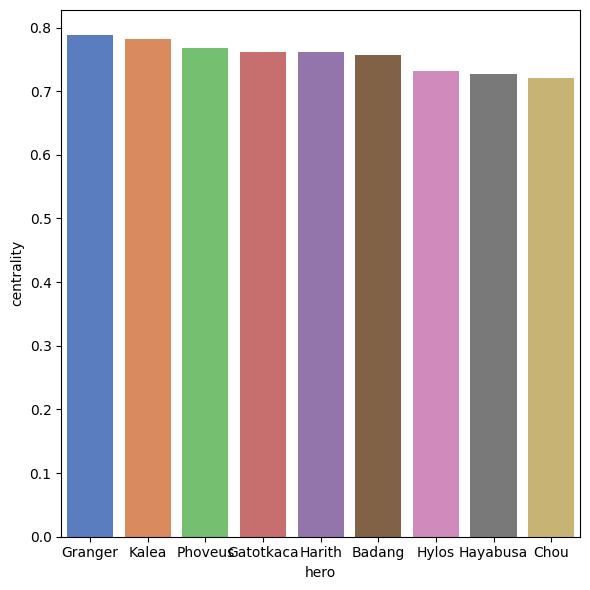

In [ ]:
# Closeness centrality
closeness_dict = nx.closeness_centrality(G)
closeness_df = pd.DataFrame.from_dict(closeness_dict, orient='index', columns=['centrality'])
closeness_df = closeness_df.sort_values('centrality', ascending=False)
# Plot top 10 nodes
plt.figure(figsize=(6,6))
closeness_df = closeness_df.rename_axis('hero').reset_index()[0:9]
sns.barplot(data=closeness_df, x='hero', y='centrality', palette = 'muted')
plt.tight_layout()

/tmp/ipython-input-3791796099.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=eigenvector_df, x='hero', y='centrality', palette = 'muted')


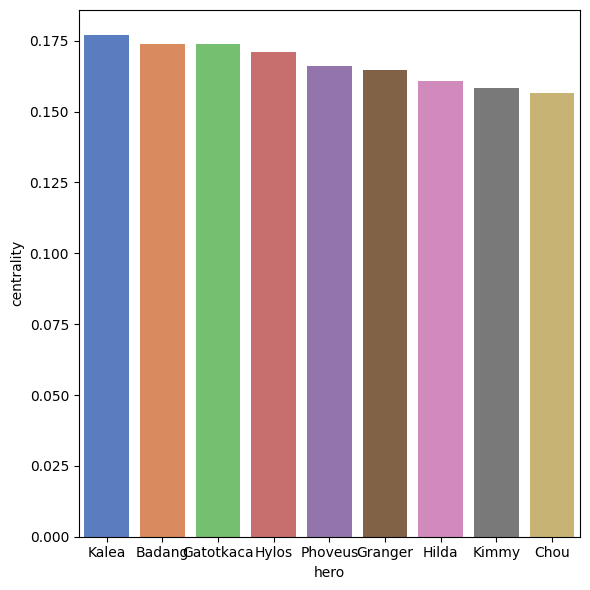

In [ ]:
# Eigenvector centrality
eigenvector_centrality = nx.eigenvector_centrality(G)
eigenvector_df = pd.DataFrame.from_dict(eigenvector_centrality, orient='index', columns=['centrality'])
eigenvector_df = eigenvector_df.sort_values('centrality', ascending=False)
# Plot top 10 nodes
plt.figure(figsize=(6,6))
eigenvector_df = eigenvector_df.rename_axis('hero').reset_index()[0:9]
sns.barplot(data=eigenvector_df, x='hero', y='centrality', palette = 'muted')
plt.tight_layout()

In [ ]:
# Winning team centrality measurement
network_hero_degree_win = ['Granger', 'Suyou', 'Harith', 'Gatotkaca', 'Badang']
hero_degree_centrality_win = ['Kalea', 'Granger', 'Harith', 'Gatotkaca', 'Badang']
hero_betweenness_centrality_win = ['Granger', 'Kalea', 'Harith', 'Phoveus', 'Badang']
hero_closeness_centrality_win = ['Kalea', 'Granger', 'Harith', 'Gatotkaca', 'Badang']
hero_eigenvector_centrality_win = ['Granger', 'Kalea', 'Gatotkaca', 'Phoveus', 'Badang']
network_hero_degree_win.sort()
hero_degree_centrality_win.sort()
hero_betweenness_centrality_win.sort()
hero_closeness_centrality_win.sort()
hero_eigenvector_centrality_win.sort()
print("Winning team heroes centrality measurement:")
print(f"Network Link hero degree : {network_hero_degree_win}")
print(f"Hero degree centrality measure : {hero_degree_centrality_win}")
print(f"Hero betweenness centrality measure : {hero_betweenness_centrality_win}")
print(f"Hero closeness centrality measure : {hero_closeness_centrality_win}")
print(f"Hero eigenvector centrality measure : {hero_eigenvector_centrality_win}")

# Losing team centrality measurement
network_hero_degree_lose = ['Granger', 'Suyou', 'Harith', 'Gatotkaca', 'Badang']
hero_degree_centrality_lose = ['Granger', 'Kalea', 'Phoveus', 'Gatotkaca', 'Harith']
hero_betweenness_centrality_lose = ['Granger', 'Harith', 'Phoveus', 'Hayabusa', 'Gatotkaca']
hero_closeness_centrality_lose = ['Granger', 'Kalea', 'Phoveus', 'Gatotkaca', 'Harith']
hero_eigenvector_centrality_lose = ['Kalea', 'Badang', 'Gatotkaca', 'Hylos', 'Phoveus']
network_hero_degree_lose.sort()
hero_degree_centrality_lose.sort()
hero_betweenness_centrality_lose.sort()
hero_closeness_centrality_lose.sort()
hero_eigenvector_centrality_lose.sort()
print("Losing team heroes centrality measurement:")
print(f"Network Link hero degree : {network_hero_degree_lose}")
print(f"Hero degree centrality measure : {hero_degree_centrality_lose}")
print(f"Hero betweenness centrality measure : {hero_betweenness_centrality_lose}")
print(f"Hero closeness centrality measure : {hero_closeness_centrality_lose}")
print(f"Hero eigenvector centrality measure : {hero_eigenvector_centrality_lose}")

Winning team heroes centrality measurement:
Network Link hero degree : ['Badang', 'Gatotkaca', 'Granger', 'Harith', 'Suyou']
Hero degree centrality measure : ['Badang', 'Gatotkaca', 'Granger', 'Harith', 'Kalea']
Hero betweenness centrality measure : ['Badang', 'Granger', 'Harith', 'Kalea', 'Phoveus']
Hero closeness centrality measure : ['Badang', 'Gatotkaca', 'Granger', 'Harith', 'Kalea']
Hero eigenvector centrality measure : ['Badang', 'Gatotkaca', 'Granger', 'Kalea', 'Phoveus']
Losing team heroes centrality measurement:
Network Link hero degree : ['Badang', 'Gatotkaca', 'Granger', 'Harith', 'Suyou']
Hero degree centrality measure : ['Gatotkaca', 'Granger', 'Harith', 'Kalea', 'Phoveus']
Hero betweenness centrality measure : ['Gatotkaca', 'Granger', 'Harith', 'Hayabusa', 'Phoveus']
Hero closeness centrality measure : ['Gatotkaca', 'Granger', 'Harith', 'Kalea', 'Phoveus']
Hero eigenvector centrality measure : ['Badang', 'Gatotkaca', 'Hylos', 'Kalea', 'Phoveus']


In [ ]:
# Assess combinations of winning and losing team heroes

list_winning_team_heroes = []
for i in df['Winning team heroes']:
  i.sort()
  list_winning_team_heroes.append(i)

list_losing_team_heroes = []
for i in df['Losing team heroes']:
  i.sort()
  list_losing_team_heroes.append(i)

df['Winning team heroes'] = list_winning_team_heroes
df_winning_heroes_team = pd.DataFrame(df['Winning team heroes'].to_list(), columns=['hero1', 'hero2', 'hero3', 'hero4', 'hero5'])

df['Losing team heroes'] = list_losing_team_heroes
df_losing_heroes_team = pd.DataFrame(df['Losing team heroes'].to_list(), columns=['hero1', 'hero2', 'hero3', 'hero4', 'hero5'])

In [ ]:
# Try to validate if the proposed hero combination from the network link centrality measures work

list_of_hero_list = [network_hero_degree_win, hero_degree_centrality_win, hero_betweenness_centrality_win, hero_closeness_centrality_win, hero_eigenvector_centrality_win,\
                     network_hero_degree_lose, hero_degree_centrality_lose, hero_betweenness_centrality_lose, hero_closeness_centrality_lose, hero_eigenvector_centrality_lose]
list_of_win = []
list_of_lose = []

j = 0
k = 0
for i in list_of_hero_list:
  for l in list_winning_team_heroes:
    if i == l:
      j += 1
  for m in list_losing_team_heroes:
    if i == m:
      k += 1
  list_of_win.append(j)
  list_of_lose.append(k)
  j = 0
  k = 0
print(list_of_win)
print(list_of_lose)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [ ]:
# Compare common heroes from centrality analysis
count_win = Counter(network_hero_degree_win + hero_degree_centrality_win + hero_betweenness_centrality_win + hero_closeness_centrality_win + hero_eigenvector_centrality_win)
count_win.most_common(5)

[('Badang', 5), ('Granger', 5), ('Gatotkaca', 4), ('Harith', 4), ('Kalea', 4)]

In [67]:
# Check for stats of hero combinations from centrality analysis

l1 = ['Badang','Granger']
l2 = ['Granger','Gatotkaca']
l3 = ['Granger','Kalea']
l4 = ['Granger','Harith']
l5 = ['Badang','Granger','Gatotkaca']
l6 = ['Badang','Granger','Kalea']
l7 = ['Gatotkaca','Granger','Kalea']
l8 = ['Gatotkaca','Harith','Kalea']
l9 = ['Badang','Harith']
l10 = ['Badang','Kalea']
l11 = ['Badang','Gatotkaca']
l12 = ['Badang','Gatotkaca','Harith']

def check_hero_combi(list_hero):
  n = 0
  m = 0
  for i in list_winning_team_heroes:
    k = False
    k = all(hero in i for hero in list_hero)
    if k == True:
      n += 1

  for j in list_losing_team_heroes:
    k = False
    k = all(hero in j for hero in list_hero)
    if k == True:
      m += 1
  if n == 0 & m == 0:
    p = 0
  else:
    p = round(n/(n+m),4)
  return n,m, p

print("Hero Combination : Win / Loss / Win Percentage %")
print(f"{l1} : {check_hero_combi(l1)}")
print(f"{l2} : {check_hero_combi(l2)}")
print(f"{l3} : {check_hero_combi(l3)}")
print(f"{l4} : {check_hero_combi(l4)}")
print(f"{l5} : {check_hero_combi(l5)}")
print(f"{l6} : {check_hero_combi(l6)}")
print(f"{l7} : {check_hero_combi(l7)}")
print(f"{l8} : {check_hero_combi(l8)}")
print(f"{l9} : {check_hero_combi(l9)}")
print(f"{l10} : {check_hero_combi(l10)}")
print(f"{l11} : {check_hero_combi(l11)}")
print(f"{l12} : {check_hero_combi(l12)}")

Hero Combination : Win / Loss / Win Percentage %
['Badang', 'Granger'] : (44, 41, 0.5176)
['Granger', 'Gatotkaca'] : (47, 44, 0.5165)
['Granger', 'Kalea'] : (49, 31, 0.6125)
['Granger', 'Harith'] : (0, 0, 0)
['Badang', 'Granger', 'Gatotkaca'] : (7, 6, 0.5385)
['Badang', 'Granger', 'Kalea'] : (1, 5, 0.1667)
['Gatotkaca', 'Granger', 'Kalea'] : (2, 1, 0.6667)
['Gatotkaca', 'Harith', 'Kalea'] : (1, 1, 0.5)
['Badang', 'Harith'] : (36, 34, 0.5143)
['Badang', 'Kalea'] : (10, 14, 0.4167)
['Badang', 'Gatotkaca'] : (26, 19, 0.5778)
['Badang', 'Gatotkaca', 'Harith'] : (7, 5, 0.5833)


In [57]:
# Working to inspect the hero combination list
l = ['Granger','Harith']

df_winning_heroes_team[(df_winning_heroes_team['hero1'].isin(l) == True) & (df_winning_heroes_team['hero2'].isin(l) == True) \
                       | (df_winning_heroes_team['hero3'].isin(l) == True) | (df_winning_heroes_team['hero4'].isin(l) == True) \
                       | (df_winning_heroes_team['hero5'].isin(l) == True)]

,hero1,hero2,hero3,hero4,hero5
6,Chou,Gatotkaca,Granger,Ling,Yve
14,Badang,Gatotkaca,Granger,Joy,Vexana
15,Cici,Gatotkaca,Hanzo,Harith,Zhuxin
24,Badang,Esmeralda,Granger,Joy,Zhuxin
27,Badang,Gatotkaca,Granger,Kimmy,Suyou
...,...,...,...,...,...
652,Baxia,Benedetta,Granger,Kalea,Selena
667,Chou,Cici,Fredrinn,Harith,LuoYi
677,Badang,Gloo,Harith,Ling,Zhuxin
683,Badang,Gloo,Harith,Hayabusa,Kimmy
